# Relational/Statistical Plots:
Relational Plots are used to perform multivariate analysis.
    1. Scatter Plots
    2. Line Plots
    3. FacetGrids

## Scatter Plots:
The scatter plot is a mainstay of statistical visualization.
It depicts the joint distribution of two variables using a cloud of points, where each point represent an observation in the dataset.
This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

Although, scatter plot can be plotted for both numerical as well as categorial data, it's mostly used to depict relationship between numerical data.

There are 2 ways to draw a scatterplot in seaborn:
    1. relplot[Figure Level Function] -> can plot scatter and line with kind property.
    2. scatterplot[Axes Level Function]

As we will see, these visualization can be quite helpful because they are somple and easily-understood representations of data even on complex data by mapping up to three additional variables using the semantics of hue, size, and style.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
plt.style.use('fivethirtyeight') # To beautify our plots

In [33]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Plot a scatter plot between total_bill and tip

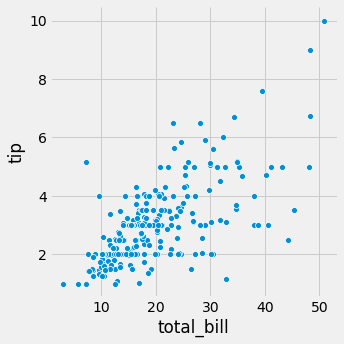

In [35]:
sns.relplot(x="total_bill", y="tip", data=tips)

kind variable is set to scatter by default thats why above code run

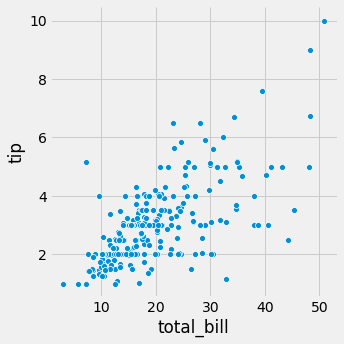

In [37]:
sns.relplot(x="total_bill", y="tip", kind="scatter", data=data)

### hue parameter
For example if we want to show the distribution based on smoker column(categorical).

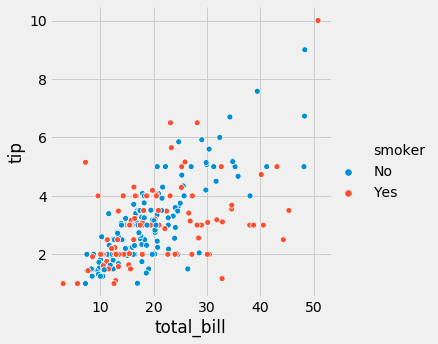

In [39]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=data)

### style parameter

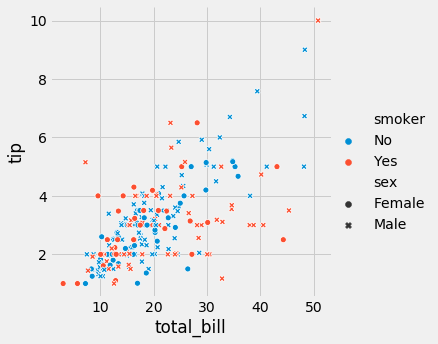

In [41]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex", data=data)

### The size parameter
##### We pass categorial data in hue and style, but we pass continuous or numeric data in size parameter.

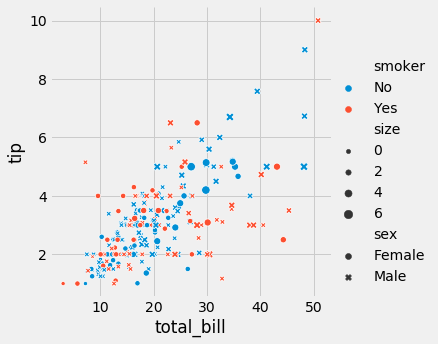

In [43]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex", size="size", data=data)

We can change size, size by a optional parameter size.

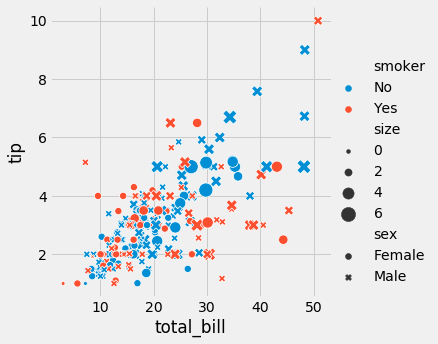

In [45]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex", size="size", sizes=(15, 200), data=data)

### Using the scatterplot function.

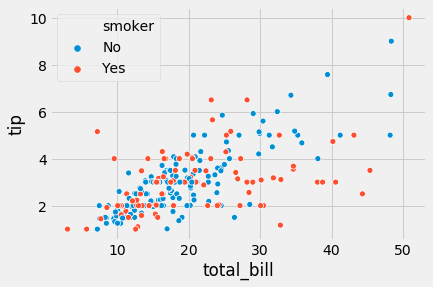

In [22]:
sns.scatterplot(x="total_bill", y="tip", hue="smoker", data=data)

# Plotting with Categorical Data

## catplot[Figure Level Function]

Categotical Scatterplots:
    1. Striplot
    2. Swarmplot

Generally for categorical plots we have,

x-axis -> categorical Data

y-axis -> Numerical Data

### stripplot

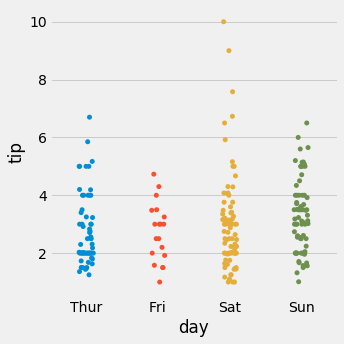

In [47]:
sns.catplot(x="day", y="tip", kind="strip", data=tips)

Noise Parameter: jitter effect

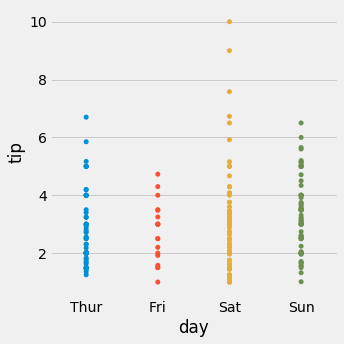

In [48]:
sns.catplot(x="day", y="tip", kind="strip", jitter=0, data=tips)

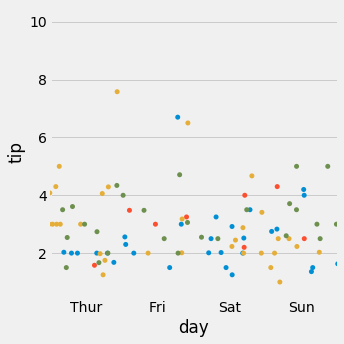

In [50]:
# Noise Parameter: jitter
sns.catplot(x="day", y="tip", kind="strip", jitter=5, data=tips)

### Swarmplot

It poisitions the same value in a manner that represents the distribution of data.

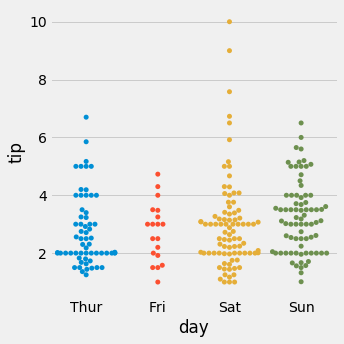

In [52]:
sns.catplot(x="day", y="tip", kind="swarm", data=tips)

We have hue parameter but not style and size.

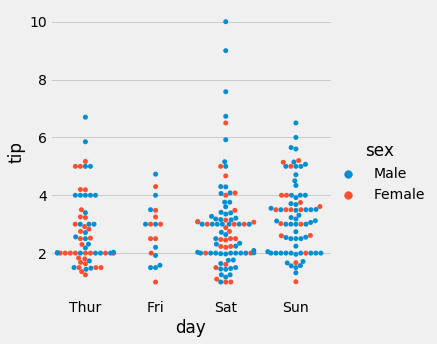

In [53]:
sns.catplot(x="day", y="tip", kind="swarm", hue="sex", data=tips)

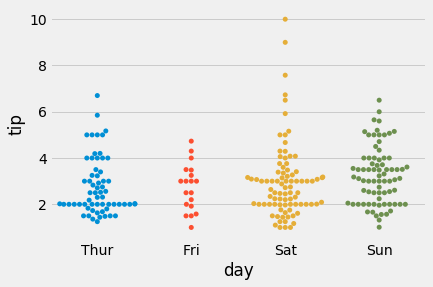

In [54]:
sns.swarmplot(x="day", y="tip", data=tips)

## Boxplot

It is a standard way of displaying the distribution of data based on a five number summary (minimum, Q1, Q2, Q3 and maximum).
It can tell you about your outliers and what values are.
It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Plotted on top of numerical data.

Can use categorical data to draw comparision between numerical data.

### Univariate Analysis in Box Plot

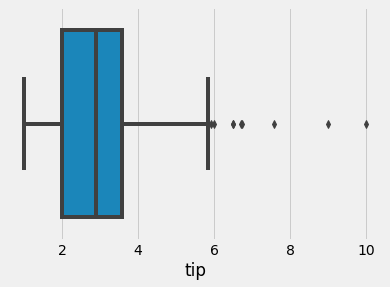

In [57]:
sns.boxplot(tips['tip'])

### Multivariate Analysis in Box Plot

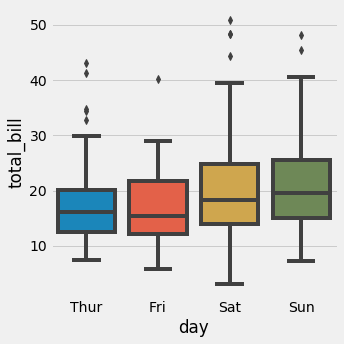

In [62]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

We can also have 3rd dimension with hue parameter in boxplot.

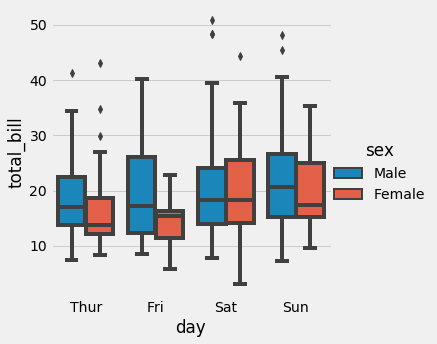

In [63]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips)

## Violin Plots

Violin plots are a method of plotting numeric data and can be considered a combination of the boxplot with a kernal density plot.

The advantage of the violen plot over the box plot is that aside from showing the abovementioned statistics it also shows the distribution of the data.

Violen plots are often used to compare the distribution of a given variables across some categories.

### Univariate Analysis in violin plots.

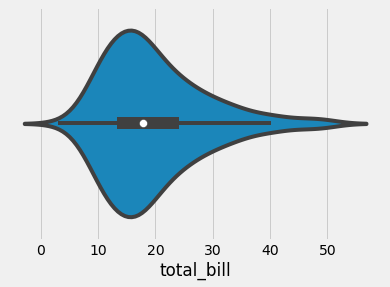

In [60]:
sns.violinplot(tips['total_bill'])

### Multivariate Analysis in violin plots.

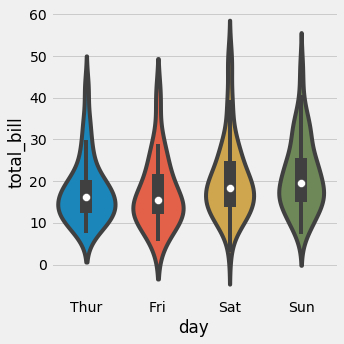

In [64]:
sns.catplot(x="day", y="total_bill", kind="violin", data=tips)

We can also have 3rd dimension with hue parameter in violinplot.

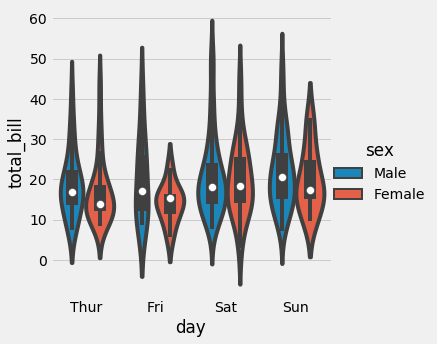

In [65]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", data=tips)

To show the distribution in less space we use split parameter and give it a value of True, it is False by default.

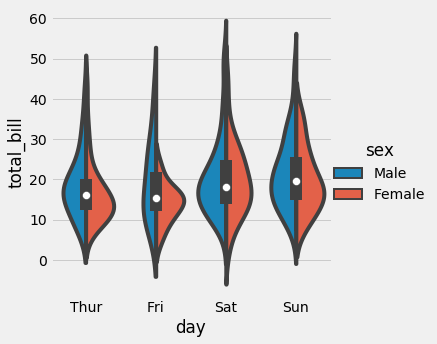

In [66]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)

## Barplots

It give information about central tendancy instead of distribution.

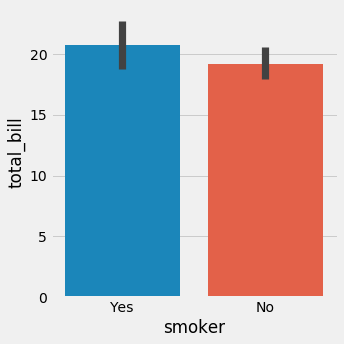

In [67]:
sns.catplot(x="smoker", y="total_bill", kind="bar", data=tips)

The black color bars are known as error bars, and they are helpful for Confidence Interval.

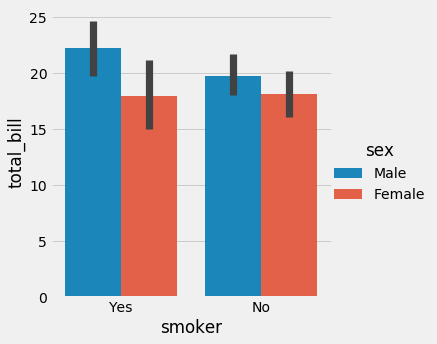

In [68]:
sns.catplot(x='smoker', y='total_bill', hue='sex', kind='bar', data=tips)

### We can tweak default of barplot i.e mean. For example.

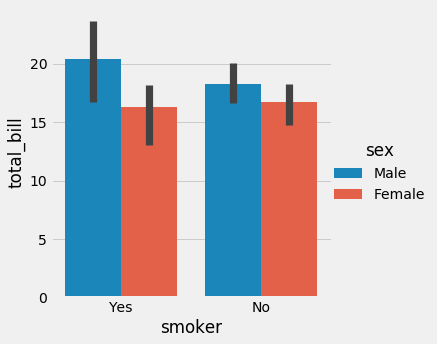

In [69]:
sns.catplot(x='smoker', y='total_bill', hue='sex', estimator=np.median, kind='bar', data=tips)

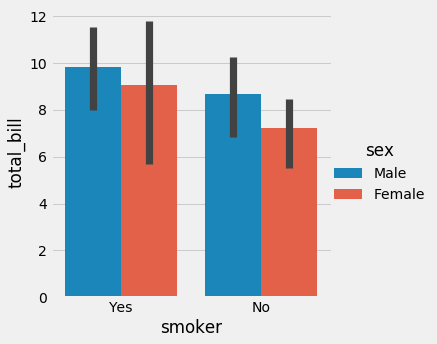

In [70]:
sns.catplot(x='smoker', y='total_bill', hue='sex', estimator=np.std, kind='bar', data=tips)

## Countplot

A special case of barplot, we take categorical value and count it's frequency.

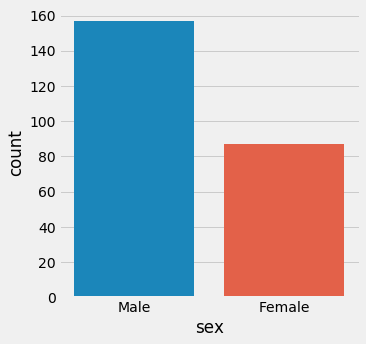

In [72]:
sns.catplot(x='sex', kind='count', data=tips)

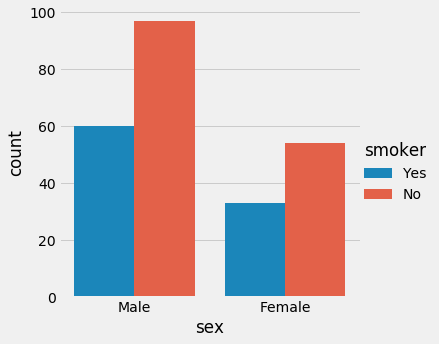

In [73]:
sns.catplot(x='sex', hue='smoker', kind='count', data=tips)

## Heatmaps

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.
Genrally, drawn between categorial data but can be used with discrete numerical data too.

In [74]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [75]:
x=flights.pivot_table(index='year', columns='month', values='passengers', aggfunc='sum')

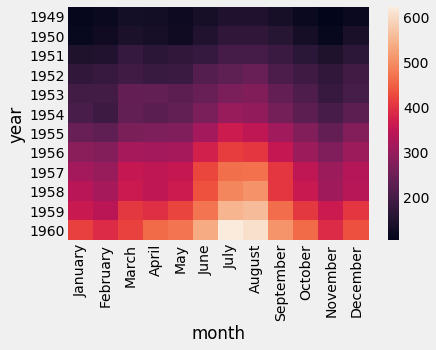

In [76]:
sns.heatmap(x)

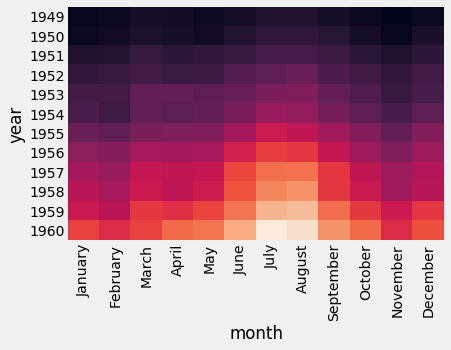

In [77]:
sns.heatmap(x, cbar=False)

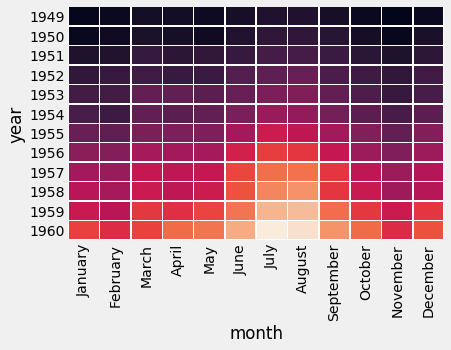

In [78]:
sns.heatmap(x, cbar=False, linewidth=0.5)

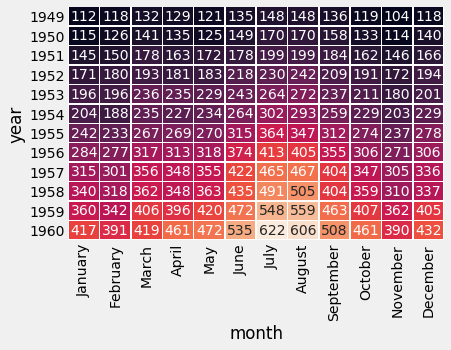

In [79]:
sns.heatmap(x, cbar=False, linewidth=0.5, annot=True, fmt='d')

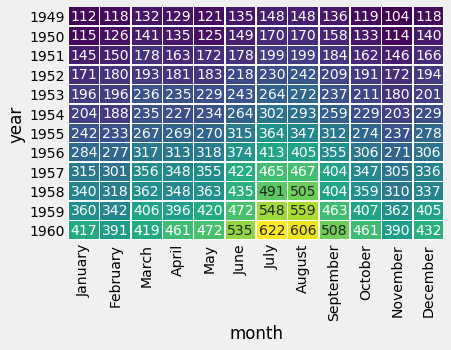

In [80]:
sns.heatmap(x, cbar=False, linewidth=0.5, annot=True, fmt='d', cmap='viridis')

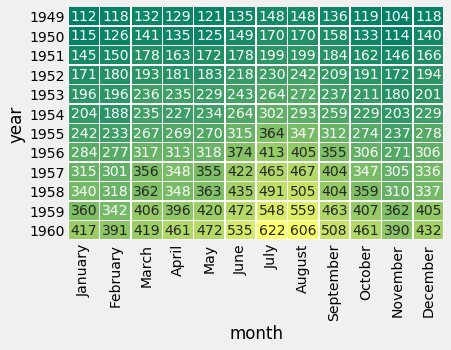

In [81]:
sns.heatmap(x, cbar=False, linewidth=0.5, annot=True, fmt='d', cmap='summer')

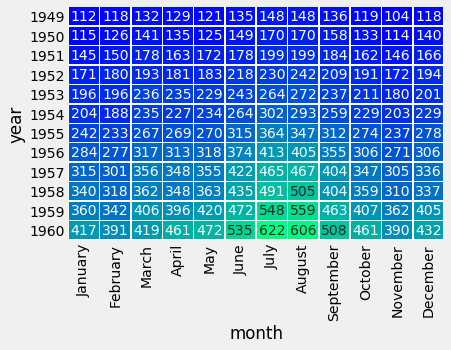

In [82]:
sns.heatmap(x, cbar=False, linewidth=0.5, annot=True, fmt='d', cmap='winter')

## Clustermap:

Only difference between heatmap and clustermap is it clusters the daata

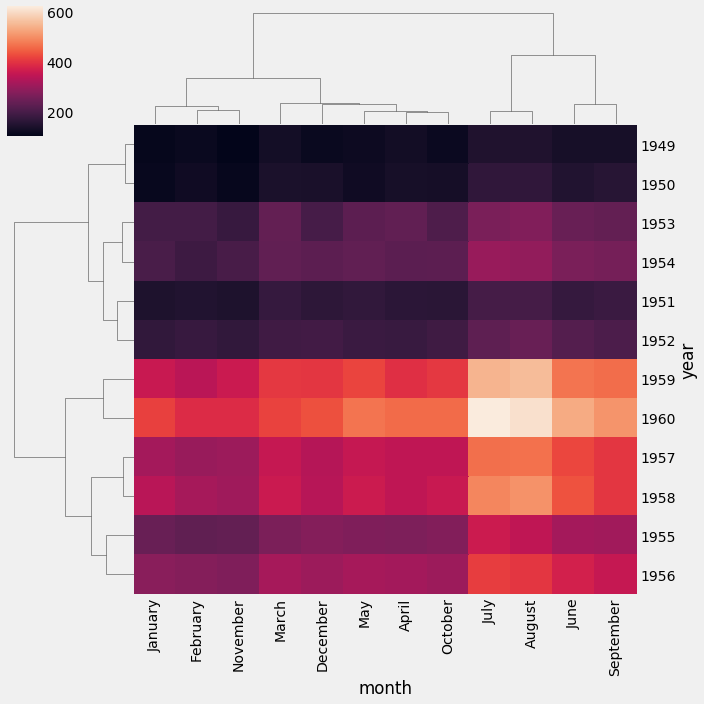

In [83]:
sns.clustermap(x)

### How clustering happens? Because of parameter metrice
Default is euclidean,

we find euclidean distance to find they are similar or not.

## Distplots

Distplots are used to do univariate analysis on a continuous/numerical data.
Distplot combines 3things in one graph:
    1. Histogram
    2. Kernel Density Estimation(PDF)
    3. Rugplot

In [84]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Plotting a displot:

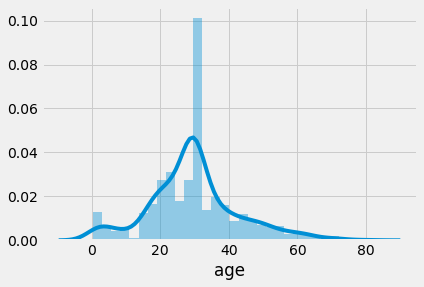

In [87]:
sns.distplot(titanic['age'])

### Plotting only the histogram
Histogram is counting the number of object in a given range.

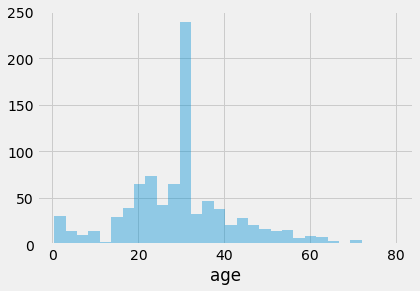

In [89]:
sns.distplot(titanic['age'], kde=False)

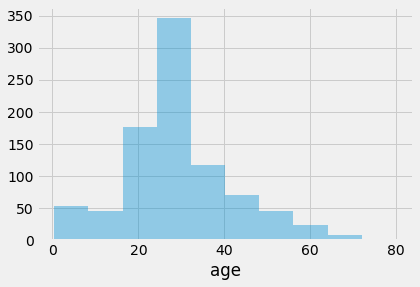

In [90]:
sns.distplot(titanic['age'], bins=10, kde=False)

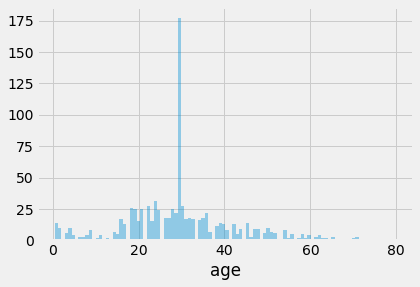

In [91]:
sns.distplot(titanic['age'], bins=100, kde=False)

### Plotting only the KDE
KDE is probability of finding that particular value

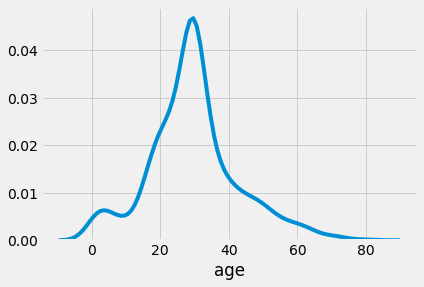

In [92]:
sns.distplot(titanic['age'], hist=False)

### Rugplot
We plot a small vertical line for every ovservation.

Benefit: We can say whether in given range points are tilted to what value or not.

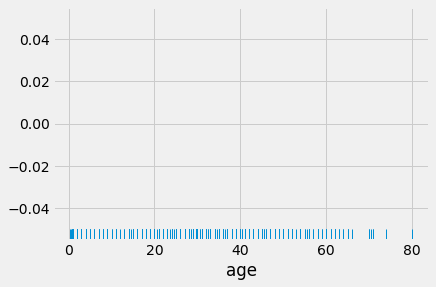

In [93]:
sns.distplot(titanic['age'], hist=False, kde=False, rug=True)

### How to use the displot: 
    1. For the side by side comparision.
    2. To discover different analysis out of data.

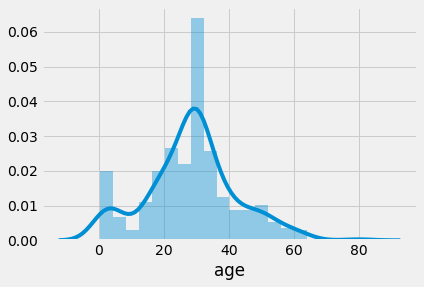

In [94]:
# Where every passenger survived.
sns.distplot(titanic[titanic['survived']==1]['age'])

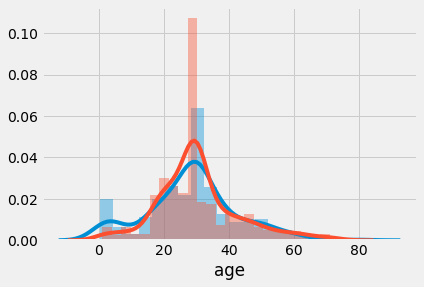

In [95]:
# Age's of people who survived vs the ages of people who died.
sns.distplot(titanic[titanic['survived']==1]['age'])
sns.distplot(titanic[titanic['survived']==0]['age'])

## Pairplots

Pairplots are used to plot multiple pariwise bivariate distributions in a dataset.
This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame.
By default, it also draws the univariate distribution of each variable on the diagonal axis.

In [97]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### The function automatically figures out what columns are numerical.

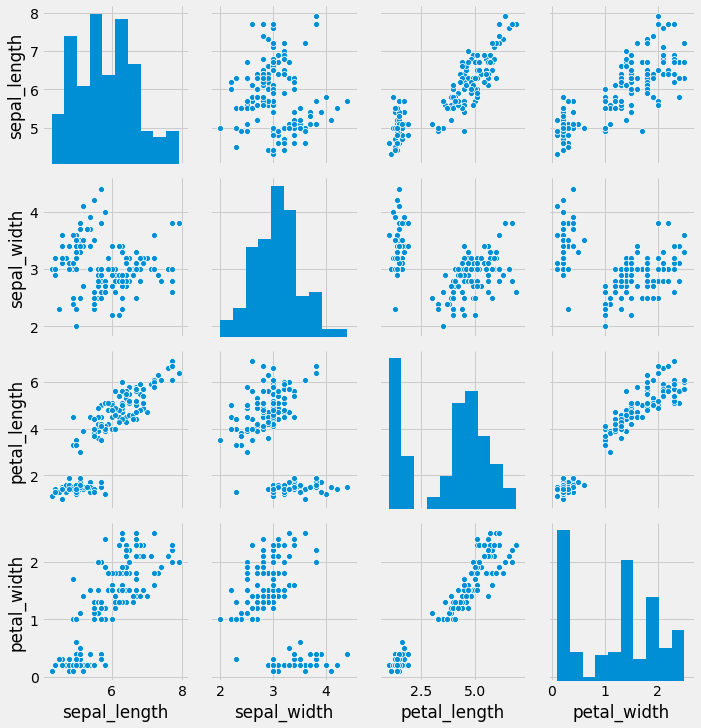

In [99]:
sns.pairplot(iris)

We can pass the categorical variable as hue parameter.

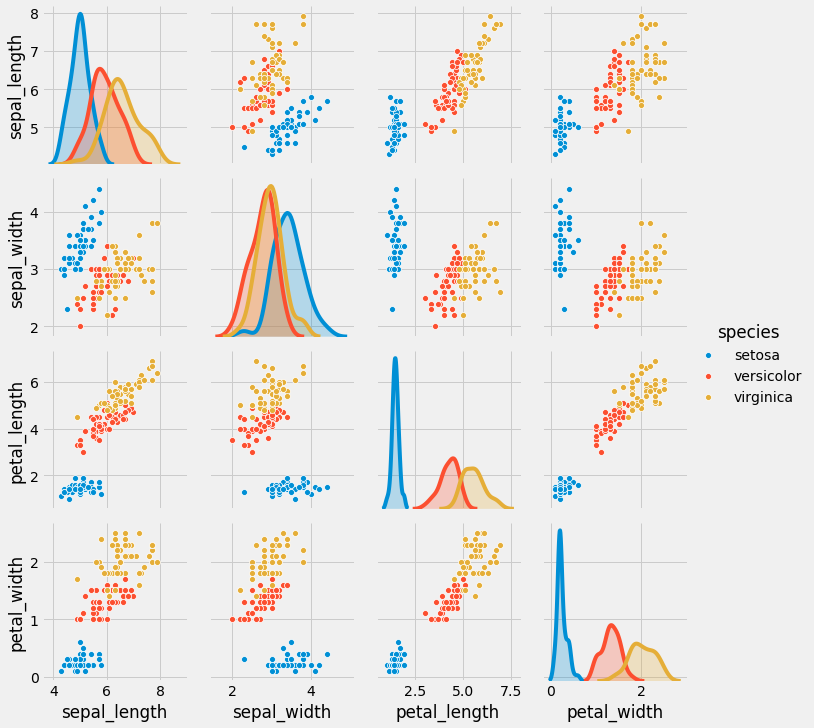

In [21]:
sns.pairplot(iris, hue='species')

## Joint Plots

Jointplots creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate(or marginal) distribution of each on separate axes.

We can use jointplots in the following manner:
    1. Scatter Plots
    2. Hexbin Plots
    3. Kde Plots
    4. RegPlot(Regression Plots)

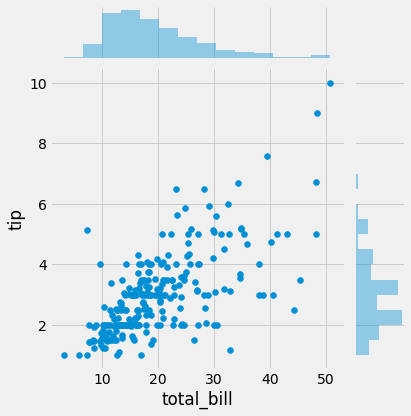

In [100]:
sns.jointplot(x='total_bill', y='tip', data=tips)

### Hexplot
Hexplot is basically a 2d histogram.

The denser(color) bins signifies higher value in that range.

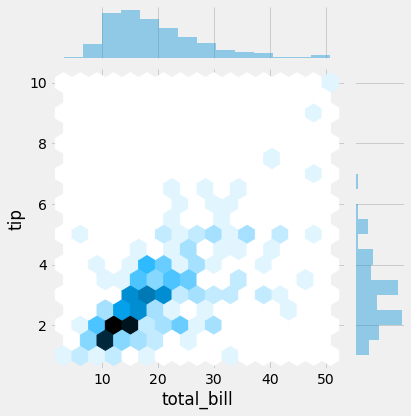

In [101]:
sns.jointplot(x='total_bill', y='tip', kind='hex', data=tips)

### A 2D kde plot.
Also known as contour.

Image a mointian, the tip of mountain is comining towards you so it's dense

Darker = Higher Value

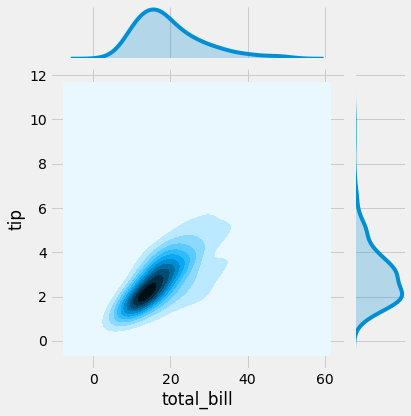

In [27]:
sns.jointplot(x='total_bill', y='tip', kind='kde', data=tips)

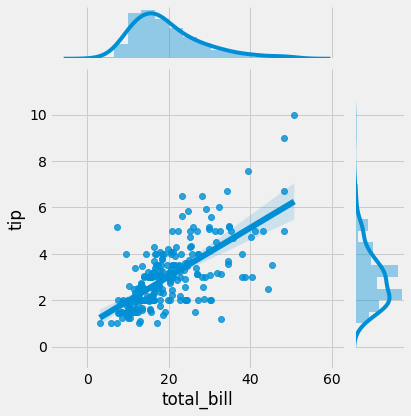

In [28]:
sns.jointplot(x='total_bill', y='tip', kind='reg', data=tips)